In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 17
plt.rcParams['axes.unicode_minus']=False
import plotly.offline as pyo
import plotly.graph_objs as go  

#### 서울특별시 전기차 충전량과 각 요소별 산점도 및 상관관계

###### 인구수

In [2]:
data=pd.read_csv("주민등록인구_20230428154200.csv")

In [3]:
seoul_2020_p=data[['동별(2)','2020 4/4']].sort_values(by='2020 4/4', ascending=False)
seoul_2020_p.columns=['구별','인구수']
seoul_2020_p.reset_index(drop=True, inplace=True)
seoul_2020_p.rename(columns={'인구수':'인구수20'},inplace=True)
seoul_2020_p=seoul_2020_p.set_index('구별')

In [4]:
seoul_2021_p=data[['동별(2)','2021 4/4']].sort_values(by='2021 4/4', ascending=False)
seoul_2021_p.columns=['구별','인구수']
seoul_2021_p.reset_index(drop=True, inplace=True)
seoul_2021_p.rename(columns={'인구수':'인구수21'},inplace=True)
seoul_2021_p=seoul_2021_p.set_index('구별')

In [5]:
seoul_p=pd.concat([seoul_2020_p,seoul_2021_p],axis=1,join='inner')

###### 충전량

In [6]:
data1=pd.read_excel("서울20년1월부터12월.xlsx")

In [7]:
data1[['시','구','도로명']]=data1["주소"].str.split(' ', n=2, expand=True)
data2=data1.groupby('구')['충전량'].sum().sort_values(ascending=False)
data2= data2.reset_index()
seoul_2020_e=pd.DataFrame(data=data2)

In [8]:
seoul_2020_e1=seoul_2020_e.loc[0:24]
seoul_2020_e1=seoul_2020_e1.rename(columns={'구':'구별'})
seoul_2020_e1=seoul_2020_e1.set_index('구별')
seoul_2020_e1=seoul_2020_e1.rename(columns = {'충전량':'충전량20'})

In [9]:
data3=pd.read_excel("서울21년1월부터12월이상치제거.xlsx")

In [10]:
data4=data3.groupby('구')['충전량'].sum().sort_values(ascending=False)
data4=data4.reset_index()
seoul_2021_e=pd.DataFrame(data=data4)

In [11]:
seoul_2021_e2=seoul_2021_e.loc[0:24]
seoul_2021_e2=seoul_2021_e2.rename(columns={'구':'구별'})
seoul_2021_e2=seoul_2021_e2.set_index('구별')
seoul_2021_e2=seoul_2021_e2.rename(columns = {'충전량':'충전량21'})

In [12]:
seoul_e=pd.concat([seoul_2020_e1,seoul_2021_e2],axis=1,join='inner')

###### 전기차대수

In [13]:
data5=pd.read_excel("21년 1월 기준 서울 자치구별 연료별 자동차등록 현황.xls")

In [14]:
data5=data5.drop(columns='Unnamed: 0')
data6=data5[data5['연료별']=='전기']
data6.reset_index(drop=True, inplace=True)
seoul_2020=data6.groupby('시군구별')['계'].sum().sort_values(ascending=False)
seoul_2020_c=pd.DataFrame(data=seoul_2020)
seoul_2020_c.reset_index(inplace=True)
seoul_2020_c.columns=['구','전기차대수']
seoul_2020_c=seoul_2020_c.rename(columns={'구':'구별','전기차대수':'전기차대수20'})
seoul_2020_c=seoul_2020_c.set_index('구별')

In [15]:
data7=pd.read_excel("22년 1월 기준 서울 자치구별 연료별 자동차등록 현황.xls")

In [16]:
data8=data7[data7['연료별']=='전기']
data8.reset_index(drop=True, inplace=True)
seoul_2021=data8.groupby('시군구별')['계'].sum().sort_values(ascending=False)
seoul_2021_c=pd.DataFrame(data=seoul_2021)
seoul_2021_c.reset_index(inplace=True)
seoul_2021_c.columns=['구','전기차대수']
seoul_2021_c=seoul_2021_c.rename(columns={'구':'구별','전기차대수':'전기차대수21'})
seoul_2021_c=seoul_2021_c.set_index('구별')

In [17]:
seoul_c=pd.concat([seoul_2020_c,seoul_2021_c],axis=1,join='inner')

###### 충전기대수

In [18]:
data9=pd.read_excel("서울전기차충전소.xlsx")

In [19]:
data9[['시','구','도로명주소']]=data9['addr'].str.split(' ',n=2, expand=True)
seoul_a=data9.groupby('구')['stat_nm'].nunique().sort_values(ascending=False)
seoul_a=pd.DataFrame(data=seoul_a)
seoul_a.reset_index(inplace=True)
seoul_a.columns=['구','충전기대수']
seoul_a=seoul_a.rename(columns={'구':'구별'})
seoul_a=seoul_a.set_index('구별')

### 각 요소 & 충전량 간의 산점도

In [20]:
seoul = pd.concat([pd.concat([pd.concat([seoul_e,seoul_p],axis=1),seoul_c],axis=1),seoul_a],axis=1)

In [21]:
seoul = seoul.sort_index()

            충전량20     충전량21     인구수20     인구수21   전기차대수20   전기차대수21     충전기대수
충전량20    1.000000  0.993652  0.452657  0.454666  0.594817  0.599425  0.567708
충전량21    0.993652  1.000000  0.504795  0.506840  0.606662  0.621635  0.589127
인구수20    0.452657  0.504795  1.000000  0.999701  0.310980  0.347999  0.545941
인구수21    0.454666  0.506840  0.999701  1.000000  0.312416  0.348128  0.544166
전기차대수20  0.594817  0.606662  0.310980  0.312416  1.000000  0.978915  0.680697
전기차대수21  0.599425  0.621635  0.347999  0.348128  0.978915  1.000000  0.706844
충전기대수    0.567708  0.589127  0.545941  0.544166  0.680697  0.706844  1.000000


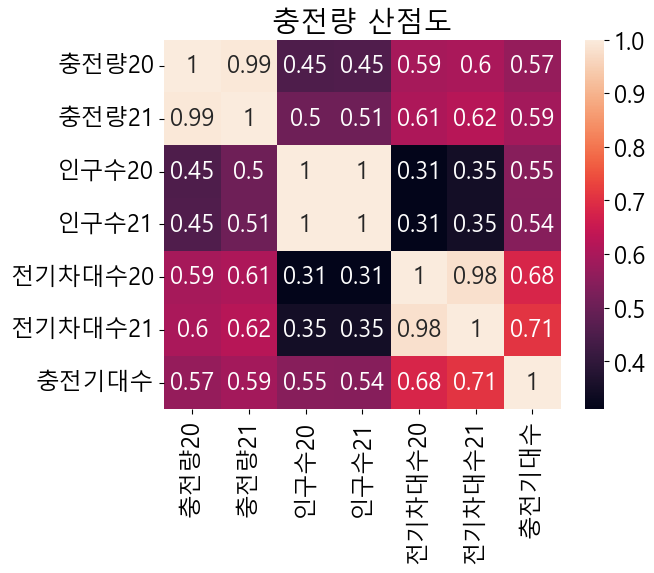

In [22]:
print(seoul.corr())
sns.heatmap(seoul.corr(),annot=True)
plt.title('충전량 산점도')
plt.show()

### 산점도(참고)

##### 총 인구수 구하기

In [23]:
seoul_2020_p1=data[['동별(2)','2020 4/4']].sort_values(by='2020 4/4', ascending=False)
seoul_2020_p1.columns=['구별','인구수']
seoul_2020_p1.reset_index(drop=True, inplace=True)
seoul_2020_p1.rename(columns={'인구수':'인구수20'},inplace=True)
seoul_2021_p1=data[['동별(2)','2021 4/4']].sort_values(by='2021 4/4', ascending=False)
seoul_2021_p1.columns=['구별','인구수']
seoul_2021_p1.reset_index(drop=True, inplace=True)
seoul_2021_p1.rename(columns={'인구수':'인구수21'},inplace=True)


In [24]:
seoul_p3=pd.merge(seoul_2020_p1,seoul_2021_p1,on='구별',how='inner')
seoul_p3['인구수20']=seoul_p3['인구수20'].astype(int)
seoul_p3['인구수21']=seoul_p3['인구수21'].astype(int)
seoul_p3['총인구수']=seoul_p3['인구수20']+seoul_p3['인구수21']
seoul_p3=seoul_p3[['구별','총인구수']]

In [25]:
seoul_p3=seoul_p3.set_index('구별').sort_index()

#### 총 충전량 구하기

In [26]:
seoul_2020_e3=seoul_2020_e.loc[0:24]
seoul_2020_e3=seoul_2020_e3.rename(columns={'구':'구별'})
seoul_2020_e3=seoul_2020_e3.rename(columns = {'충전량':'충전량20'})
seoul_2021_e4=seoul_2021_e.loc[0:24]
seoul_2021_e4=seoul_2021_e4.rename(columns={'구':'구별'})
seoul_2021_e4=seoul_2021_e4.rename(columns = {'충전량':'충전량21'})

In [27]:
seoul_p4=pd.merge(seoul_2020_e3,seoul_2021_e4,on='구별',how='inner')
seoul_p4['충전량20']=seoul_p4['충전량20'].astype(int)
seoul_p4['충전량21']=seoul_p4['충전량21'].astype(int)
seoul_p4['총충전량']=seoul_p4['충전량20']+seoul_p4['충전량21']
seoul_p4=seoul_p4[['구별','총충전량']]

In [28]:
seoul_p4=seoul_p4.set_index('구별').sort_index()

#### 총 전기차대수 구하기

In [29]:
seoul_2020_c1=pd.DataFrame(data=seoul_2020)
seoul_2020_c1.reset_index(inplace=True)
seoul_2020_c1.columns=['구','전기차대수']
seoul_2020_c1=seoul_2020_c1.rename(columns={'구':'구별','전기차대수':'전기차대수20'})
seoul_2021_c1=pd.DataFrame(data=seoul_2021)
seoul_2021_c1.reset_index(inplace=True)
seoul_2021_c1.columns=['구','전기차대수']
seoul_2021_c1=seoul_2021_c1.rename(columns={'구':'구별','전기차대수':'전기차대수21'})

In [30]:
seoul_p5=pd.merge(seoul_2020_c1,seoul_2021_c1,on='구별',how='inner')
seoul_p5['전기차대수20']=seoul_p5['전기차대수20'].astype(int)
seoul_p5['전기차대수21']=seoul_p5['전기차대수21'].astype(int)
seoul_p5['총전기차대수']=seoul_p5['전기차대수20']+seoul_p5['전기차대수21']
seoul_p5=seoul_p5[['구별','총전기차대수']]

In [31]:
seoul_p5=seoul_p5.set_index('구별').sort_index()

#### 총 충전기대수 구하기

In [32]:
seoul_a1=pd.DataFrame(data=seoul_a)
seoul_a1.reset_index(inplace=True)
seoul_a1.columns=['구','충전기대수']
seoul_a1=seoul_a1.rename(columns={'구':'구별','충전기대수':'총충전기대수'})

In [33]:
seoul_a1=seoul_a1.set_index('구별').sort_index()

In [34]:
seoul2 = pd.concat([pd.concat([pd.concat([seoul_p3,seoul_p4],axis=1),seoul_p5],axis=1),seoul_a1],axis=1)

In [35]:
seoul2

,총인구수,총충전량,총전기차대수,총충전기대수
구별,,,,
강남구,1081855,1280038,19226,300
강동구,930470,641270,1936,124
강북구,614132,168196,806,75
강서구,1165669,439571,2607,251
관악구,1009252,198086,1175,96
광진구,712736,565998,913,83
구로구,853651,425459,4806,181
금천구,492726,187885,984,125
노원구,1041978,492426,1381,171


#### 충전량 & 전기차대수

In [36]:
data1 = go.Scatter(x=seoul['충전량20'], y=seoul['전기차대수20'], mode='markers')
data2 = go.Scatter(x=seoul['충전량21'], y=seoul['전기차대수21'], mode='markers')
data = [data1, data2]
pyo.iplot(data)

#### 충전량 & 인구수

In [37]:
data3 = go.Scatter(x=seoul['충전량20'], y=seoul['인구수20'], mode='markers')
data4 = go.Scatter(x=seoul['충전량21'], y=seoul['인구수21'], mode='markers')
data = [data3, data4]
pyo.iplot(data)

#### 충전량 & 충전기대수

In [38]:
data5 = go.Scatter(x=seoul['충전량20'], y=seoul['충전기대수'], mode='markers')
data6 = go.Scatter(x=seoul['충전량21'], y=seoul['충전기대수'], mode='markers')
data = [data5, data6]
pyo.iplot(data)

In [39]:
seoul2.head()

,총인구수,총충전량,총전기차대수,총충전기대수
구별,,,,
강남구,1081855,1280038,19226,300
강동구,930470,641270,1936,124
강북구,614132,168196,806,75
강서구,1165669,439571,2607,251
관악구,1009252,198086,1175,96


            총인구수      총충전량    총전기차대수    총충전기대수
총인구수    1.000000  0.481434  0.335672  0.545098
총충전량    0.481434  1.000000  0.611078  0.579706
총전기차대수  0.335672  0.611078  1.000000  0.700220
총충전기대수  0.545098  0.579706  0.700220  1.000000


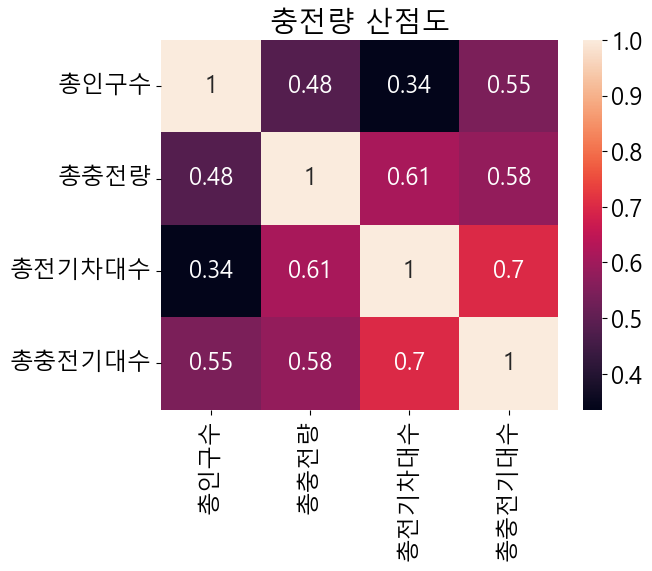

In [40]:
print(seoul2.corr())
sns.heatmap(seoul2.corr(),annot=True)
plt.title('충전량 산점도')
plt.show()

<Axes: xlabel='총충전량', ylabel='총인구수'>

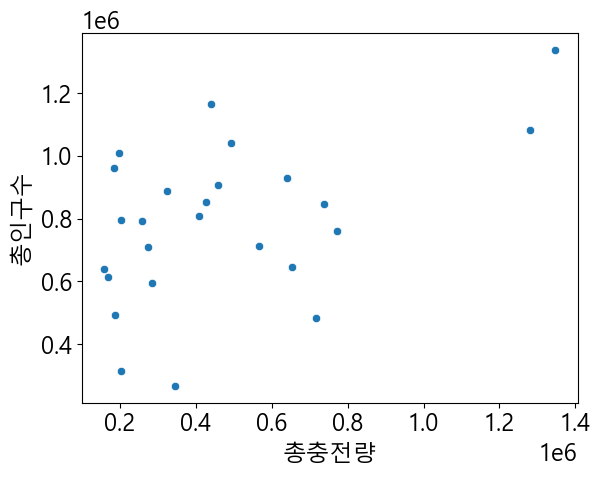

In [41]:
sns.scatterplot(x=seoul2['총충전량'],y=seoul2['총인구수'])

<Axes: xlabel='총충전량', ylabel='총인구수'>

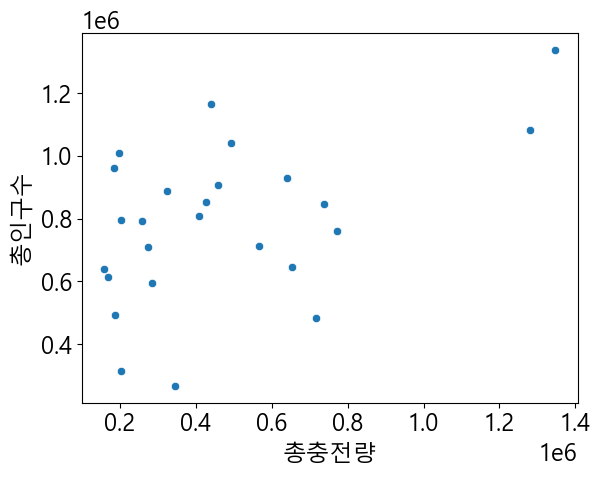

In [42]:
sns.scatterplot(x=seoul2['총충전량'],y=seoul2['총인구수'])

<Axes: xlabel='총충전량', ylabel='총전기차대수'>

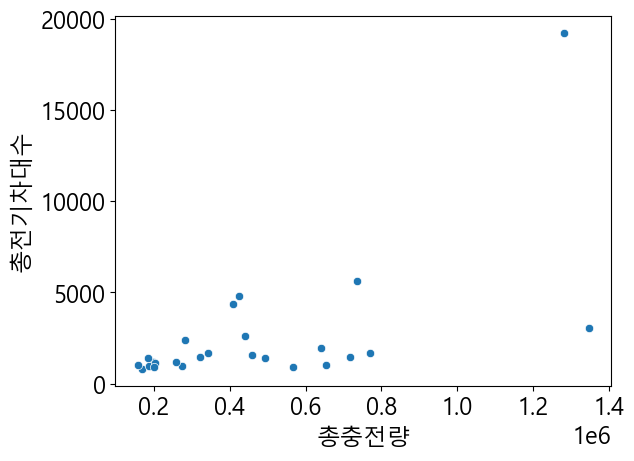

In [43]:
sns.scatterplot(x=seoul2['총충전량'],y=seoul2['총전기차대수'])

<Axes: xlabel='총충전량', ylabel='총충전기대수'>

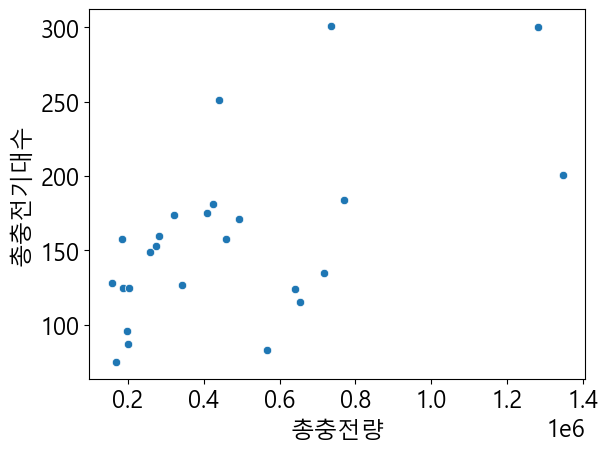

In [44]:
sns.scatterplot(x=seoul2['총충전량'],y=seoul2['총충전기대수'])

<Axes: xlabel='총충전량', ylabel='총인구수'>

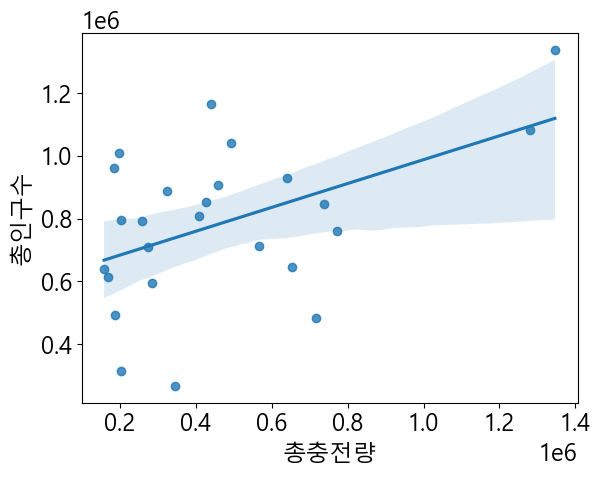

In [45]:
sns.regplot(x=seoul2['총충전량'],y=seoul2['총인구수'])

<Axes: xlabel='총충전량', ylabel='총전기차대수'>

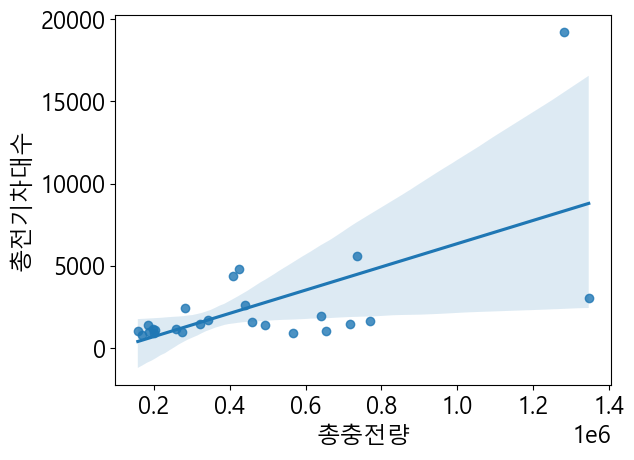

In [46]:
sns.regplot(x=seoul2['총충전량'],y=seoul2['총전기차대수'])

<Axes: xlabel='총충전량', ylabel='총충전기대수'>

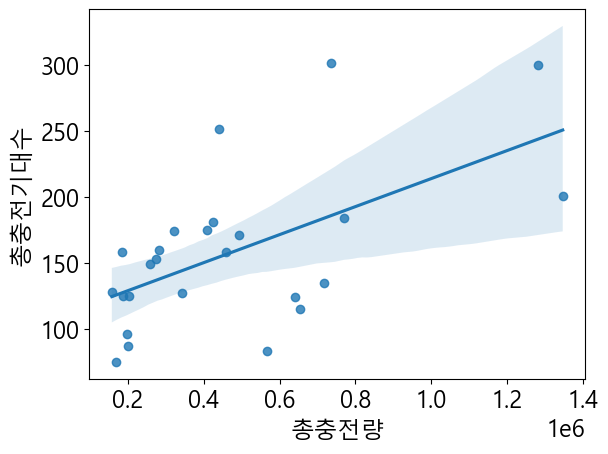

In [47]:
sns.regplot(x=seoul2['총충전량'],y=seoul2['총충전기대수'])

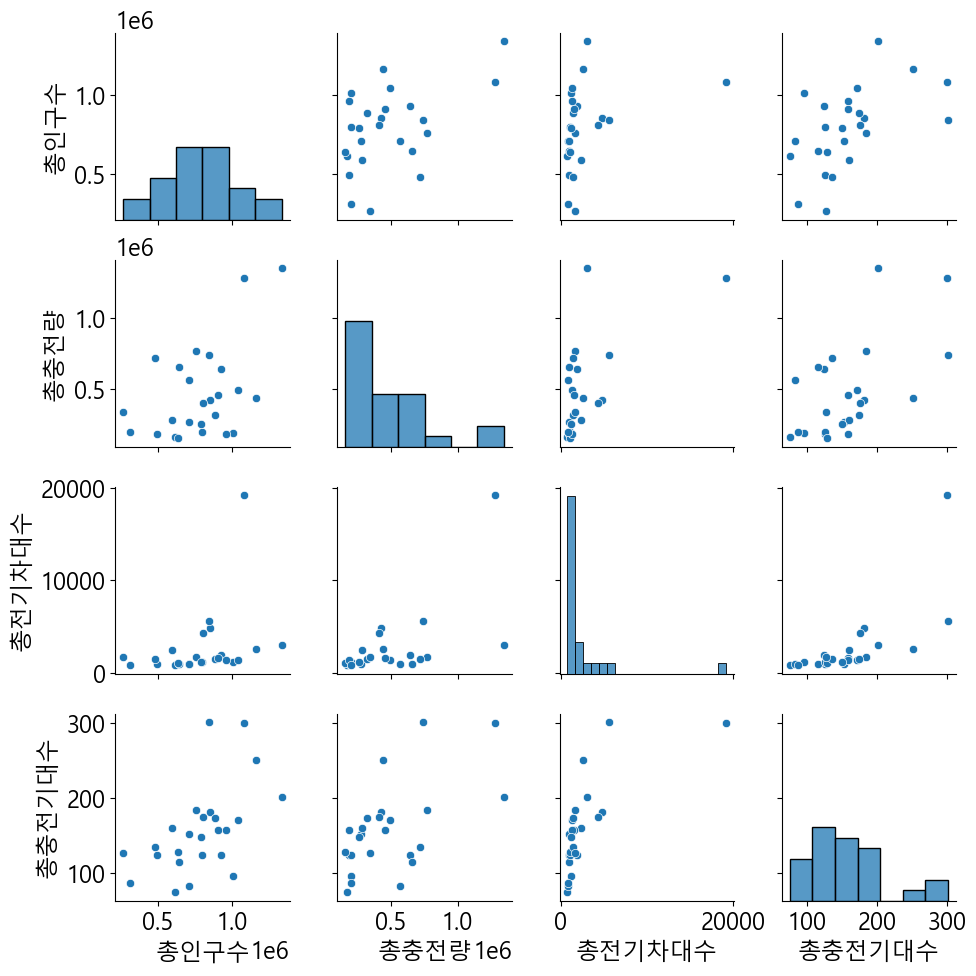

In [48]:
sns.pairplot(seoul2)
